In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('stats_tourisme.csv')
#print(df.head())
sns.set_style('darkgrid')
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

La fonction suivante va permettre d'ajouter les noms de chaque pays à côté des points correspondants sur les graphes que nous allons tracer :

In [15]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

## Disponibilité du voyage aérien

Le tourisme international s'est beaucoup développé grâce à la démocratisation de l'avion. La plupart des touristes utilisent ce moyen de transport pour traverser les frontières, qu'elles soient terrestres ou marines.

On va commencer par regarder s'il y a un lien entre le nombre d'habitants et le nombre de voyageurs aériens pour tous les pays.

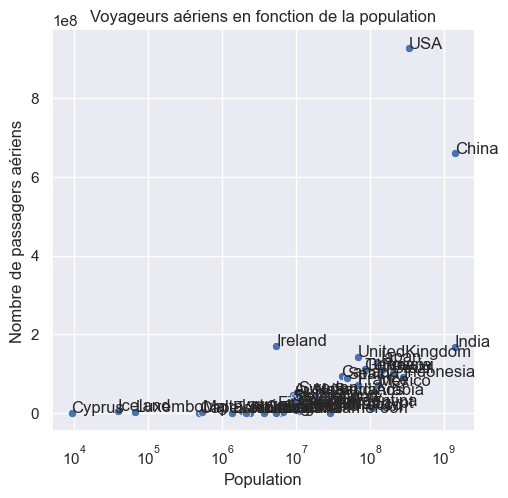

In [16]:
masque = (df['Touristes annuels'].notna()) & (df['Nombre de passagers aériens'].notna())
touristes_par_avion = df.loc[masque, ['Pays', 'Touristes annuels', 'Nombre de passagers aériens', 'PIB / habitant', 'Population']]


graphique = sns.relplot(data=touristes_par_avion, x='Population', y='Nombre de passagers aériens')
graphique.set(xscale = 'log', title = "Voyageurs aériens en fonction de la population");

label_point(touristes_par_avion['Population'],touristes_par_avion['Nombre de passagers aériens'], touristes_par_avion['Pays'], plt.gca())

Cela semble être le cas puisqu'on obtient une courbe qui ressemble à une exponentielle, traduisant une relation linéaire entre nos deux paramètres.

L'avion est un moyen de transport qui nécessite d'importantes infrastructures. On peut donc imaginer que ce soit en priorité les pays les plus riches qui utilisent l'avion.

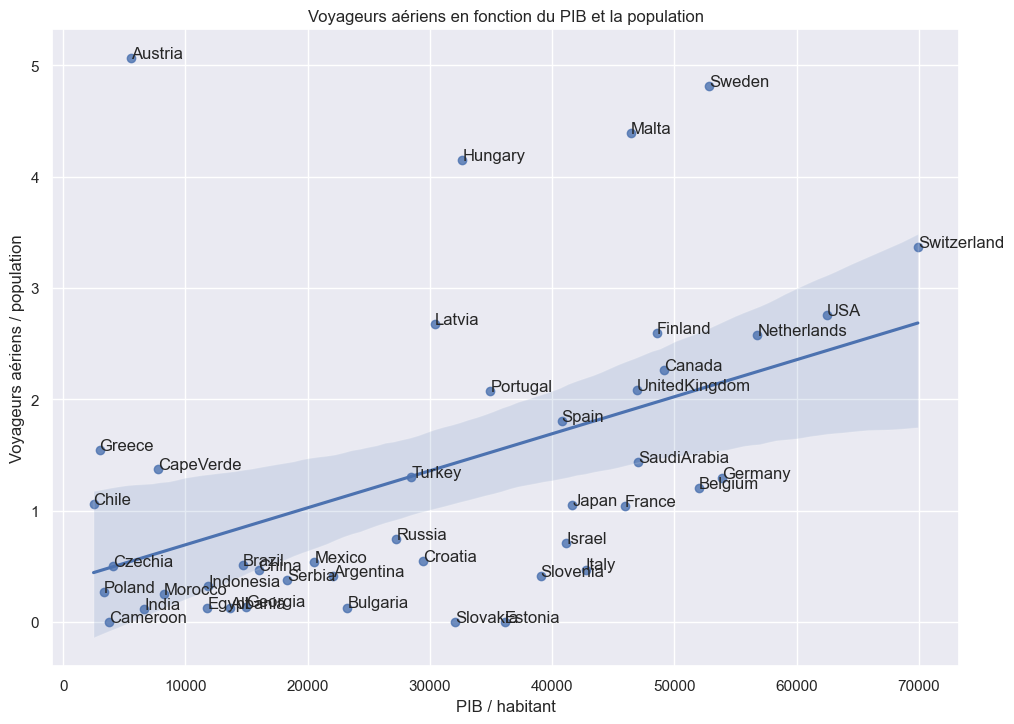

In [18]:
touristes_par_avion['Voyageurs aériens / population'] = touristes_par_avion['Nombre de passagers aériens'] / touristes_par_avion['Population']

#On élimine les pays avec trop de voyageurs aériens pour pouvoir visualiser correctement les autres
exclusion_pays = touristes_par_avion[(touristes_par_avion['Pays'] != 'Ireland') & (touristes_par_avion['Pays'] != 'Luxembourg') & (touristes_par_avion['Pays'] != 'Cyprus') & (touristes_par_avion['Pays'] != 'Iceland')]

graphique = sns.regplot(data=exclusion_pays, x='PIB / habitant', y='Voyageurs aériens / population')
graphique.set(title = "Voyageurs aériens en fonction du PIB et la population");

label_point(exclusion_pays['PIB / habitant'],exclusion_pays['Voyageurs aériens / population'], exclusion_pays['Pays'], plt.gca())


Lorsque le PIB par habitant d'un pays augmente, les habitants ont tendance à plus souvent prendre l'avion ;  et ce quel que soit le continent. L'avion est donc une caractéristique des pays les plus riches, mais est-ce que cela se reflète sur le tourisme ?

Plus d'avions vers un pays devrait vouloir dire plus de touristes ?

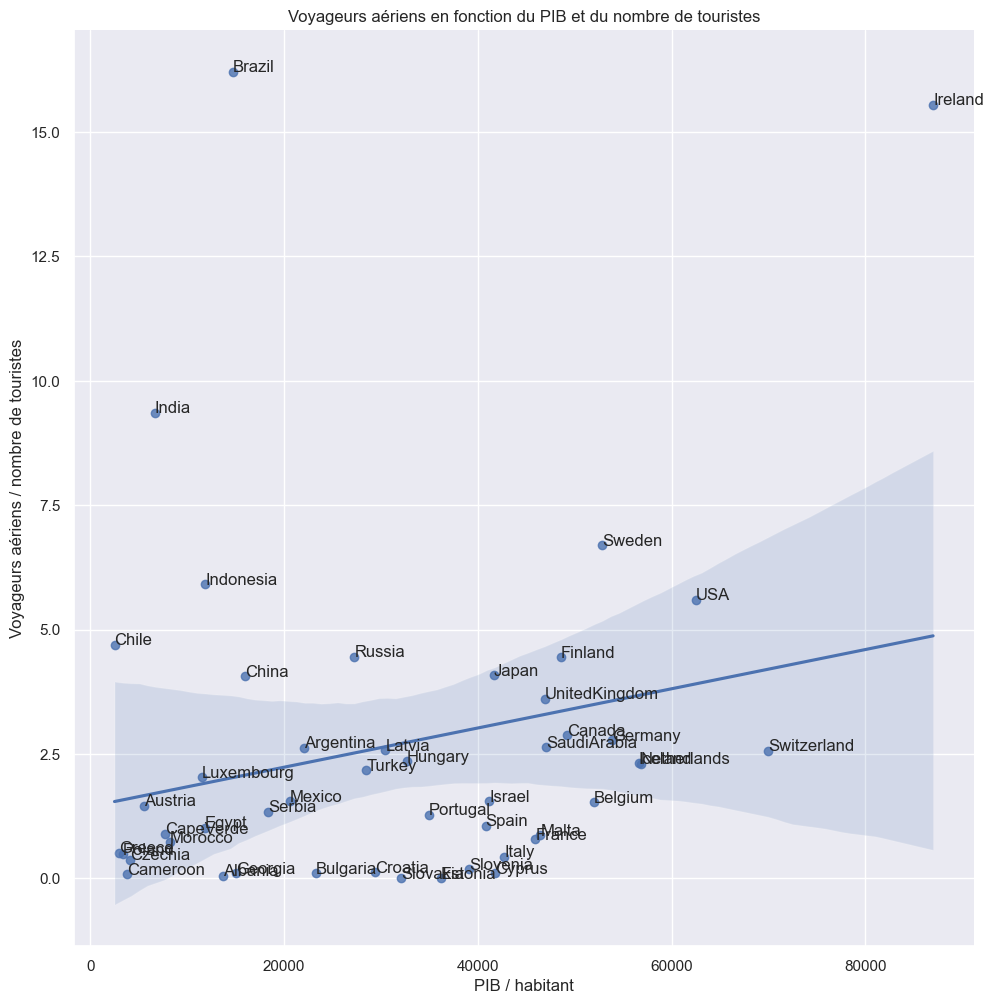

In [29]:
touristes_par_avion['Voyageurs aériens / nombre de touristes'] = touristes_par_avion['Nombre de passagers aériens'] / touristes_par_avion['Touristes annuels']

graphique = sns.lmplot(data=touristes_par_avion, x='PIB / habitant', y='Voyageurs aériens / nombre de touristes', height = 10)
graphique.set(title = "Voyageurs aériens en fonction du PIB et du nombre de touristes");

label_point(touristes_par_avion['PIB / habitant'],touristes_par_avion['Voyageurs aériens / nombre de touristes'], touristes_par_avion['Pays'], plt.gca())


Ici encore on obtient une fonction croissante du PIB par habitant.

Néanmoins, pour la majorité des pays, le nombre de voyages aériens est bien supérieur au nombre de touristes : il y a au moins deux fois plus de voyages en avion que de visiteurs annuels du pays.
On en déduit que le tourisme ne concerne finalement qu'une faible part du trafic aérien. L'essentiel de ce domaine est probablement liée au business.

Il est donc difficile de tirer des conclusions sur le tourisme à partir de résultats sur les voyages en avion.

## Tourisme international et intranational

Dans cette partie, nous allons nous intéresser aux liens entre les différents pays dans le domaine du tourisme. 

Quels sont les pays qui dépendent le plus du tourisme ? Quels sont ceux qui y perdent de l'argent ? Certains pays sont-ils "auto-suffisants" dans ce domaine - ont-ils suffisamment de commerce uniquement avec leurs propres habitants ?

Dans le cadre de la crise liée à la pandémie de Covid-19, le secteur du tourisme a été particulièrement affecté par la suppression des trajets internationaux et/ou de longue distance. Pour survivre économiquement, les acteurs de ce secteur ont du compter sur un tourisme plus local, et notamment sur leurs propres compatriotes.


Commençons par regarder quels pays dépendent le plus des investissements étrangers liés aux tourismes.

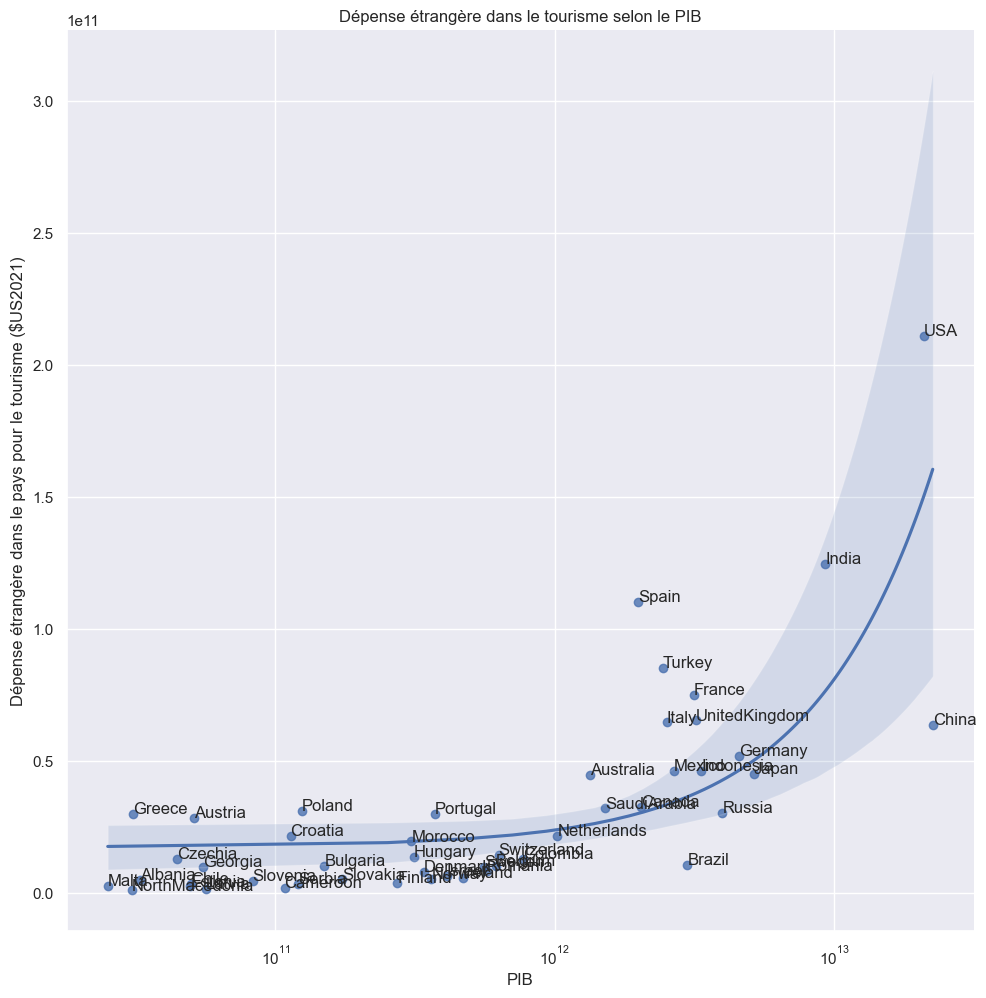

In [40]:
masque = (df['Dépense étrangère dans le pays pour le tourisme ($US2021)'].notna())
tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population','Dépense étrangère dans le pays pour le tourisme ($US2021)']]

tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissements_etrangers = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.lmplot(data=investissements_etrangers, x='PIB', y='Dépense étrangère dans le pays pour le tourisme ($US2021)', height = 10)
graphique.set(xscale = 'log', title = "Dépense étrangère dans le tourisme selon le PIB");

label_point(investissements_etrangers['PIB'], investissements_etrangers['Dépense étrangère dans le pays pour le tourisme ($US2021)'], investissements_etrangers['Pays'], plt.gca())


On retrouve une nouvelle relation linéaire.

La France, la Turquie, l'Espagne, l'Italie et le Royaume-Uni se démarquent : ces pays reçoivent d'importantes sommes d'argent de l'étranger grâce à leur branche touristique.
Au contraire, le Brésil et la Chine en sont moins dépendants : leur économie est majoritairement fondée sur l'agriculture et l'industrie respectivement.

On peut aussi s'intéresser aux pays les plus généreux dans le tourisme :

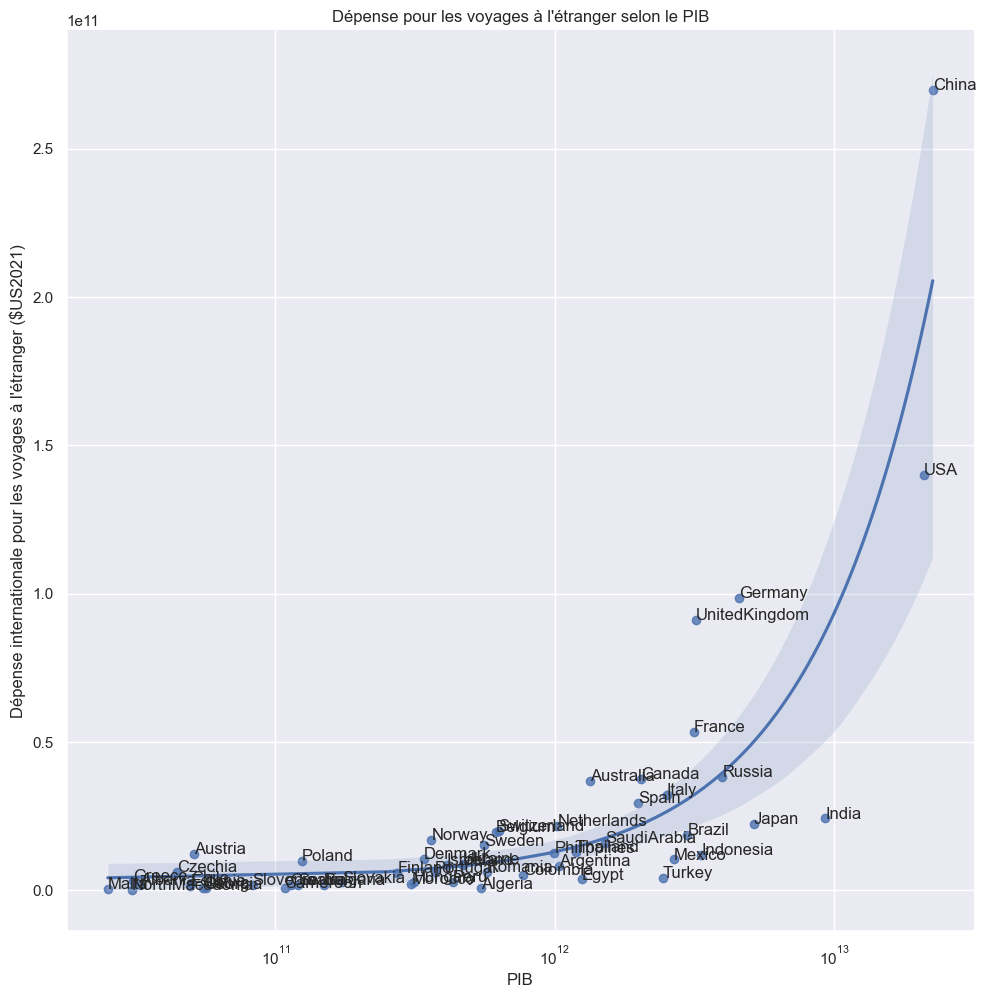

In [39]:
masque = df["Dépense internationale pour les voyages à l'étranger ($US2021)"].notna()
tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population', "Dépense internationale pour les voyages à l'étranger ($US2021)"]]
tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissements_a_letranger = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.lmplot(data=investissements_a_letranger, x='PIB', y="Dépense internationale pour les voyages à l'étranger ($US2021)", height = 10)
graphique.set(xscale = 'log', title = "Dépense pour les voyages à l'étranger selon le PIB");

label_point(investissements_a_letranger['PIB'], investissements_a_letranger["Dépense internationale pour les voyages à l'étranger ($US2021)"], investissements_a_letranger['Pays'], plt.gca())

Cette fois-ci, c'est l'Allemagne qui arrive en tête avec le Royaume-Uni, l'Australie, le Canada et la France. Ces pays ont beaucoup de citoyens qui partent à l'étranger et y dépensent de l'argent.

On peut aussi remarquer que la Chine et les USA ont quasiment échangé de place !

Ainsi l'Espagne et l'Italie mais surtout la Turquie ont des comptes positifs pour ce qui concernce le tourisme : il y a beaucoup plus d'investissement étranger que d'argent dépensé par la population.

Regardons la comparaison des deux critères pour tous les pays :

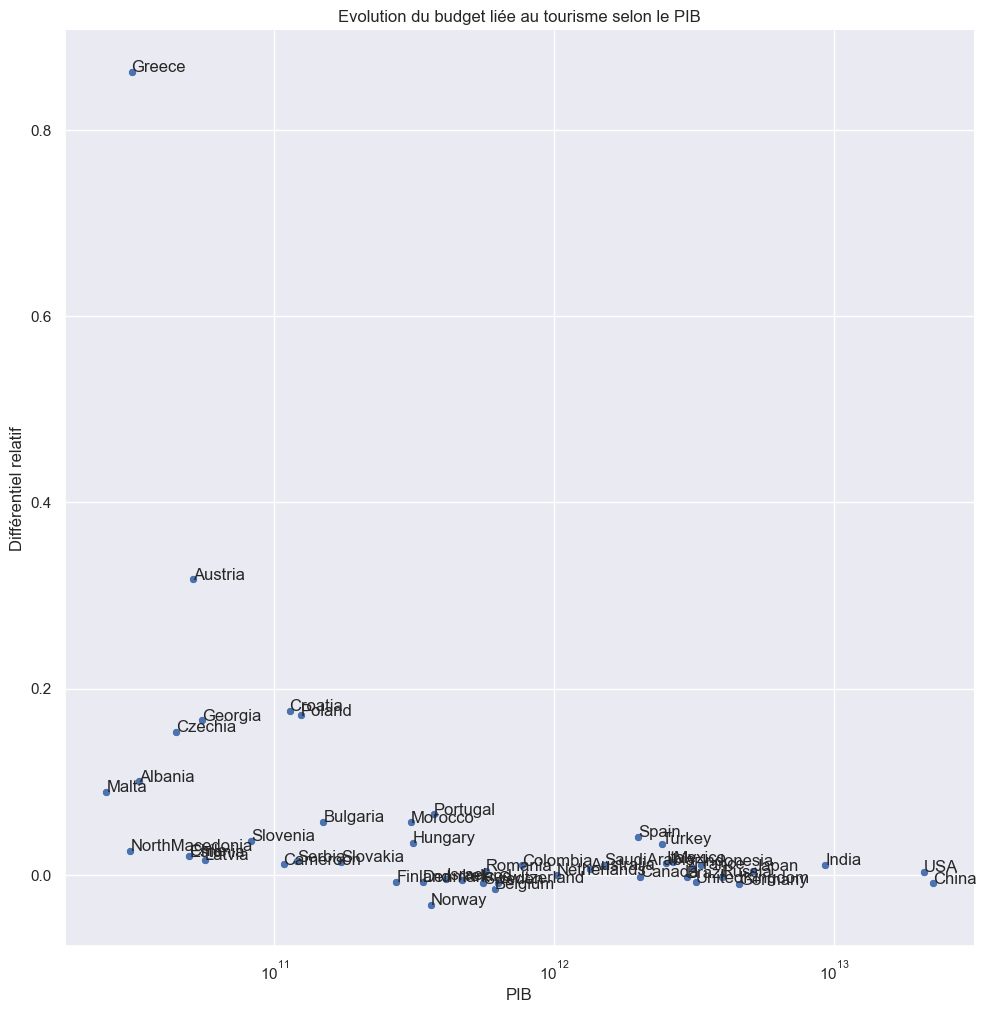

In [44]:
masque = (df["Dépense internationale pour les voyages à l'étranger ($US2021)"].notna()) & (df["Dépense étrangère dans le pays pour le tourisme ($US2021)"].notna())

tableau = df.loc[masque, ['Pays', 'PIB / habitant', 'Population', "Dépense internationale pour les voyages à l'étranger ($US2021)", "Dépense étrangère dans le pays pour le tourisme ($US2021)"]]
tableau['PIB'] = tableau['PIB / habitant'] * tableau['Population']
tableau['Différentiel relatif'] = (tableau['Dépense étrangère dans le pays pour le tourisme ($US2021)'] - tableau["Dépense internationale pour les voyages à l'étranger ($US2021)"]) / tableau['PIB']

#On élimine les pays avec un PIB trop faible pour bien visualiser la courbe
investissement_global = tableau[(tableau['Pays'] != 'CapeVerde') & (tableau['Pays'] != 'Luxembourg') & (tableau['Pays'] != 'Cyprus') & (tableau['Pays'] != 'Iceland')]

graphique = sns.relplot(data=investissement_global, x='PIB', y="Différentiel relatif", height = 10)
graphique.set(xscale='log', title = "Evolution du budget liée au tourisme selon le PIB");

label_point(investissement_global['PIB'], investissement_global["Différentiel relatif"], investissement_global['Pays'], plt.gca())

Sur ce dernier graphique, il apparaît clairement que la Grèce est le pays qui dépend le plus du tourisme étranger.

L'Autriche, la Croatie, la Pologne, la Géorgie, la Tchéquie sont également gagnants loersqu'on compare les recettes et les dépenses.

Finalement, les gains constatés pour l'Espagne, les USA, la Turquie ne sont pas si conséquents : le tourisme est donc avant tout important pour les nations les plus petites.

Regardons maintenant dans quelle mesure le tourisme local pourrait jouer un rôle dans l'économie de certains pays.